# Cross-Cohort Music Recommendation - EDA

You are a data scientist for a remote education company. Your manager is interested in exploring non-traditional ways of boosting remote student engagement.

One avenue that they would like to particularly explore is the effect of "waiting-room" music on a students attentiveness for a 4-hour class. They've provided you a dataset of 61 songs and their "music2vec" embeddings.

You will complete the idiomatic steps of the machine-learning pipeline:
* EDA: what sorts of relationships/clusterings do you notice within your dataset?
* Machine Learning: which machine learning pipeline should you apply to your dataset. How will you measure the effectiveness of this model?

Once you generate your machine learning model, you will then serialize it and load it into a dashboard which provides song recommendations based on a users listening history.

To run this dashboard execute the following command in your terminal (after you've completed clustering)

```bash
streamlit run recommender.py
```

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import itertools, os

from sklearn.decomposition import PCA

In [11]:
# TODO: load in dataset
songs = pd.read_csv('../data/music_embeds.csv')

# TODO: view first few columns
songs.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [12]:
# TODO: select your predictive columns
X = songs.drop(columns=['song', 'genre', 'filename'])

# TODO: select your song-name column for later manipulation
song_names = songs['song']

# TODO: select your genre column for later manipulation
genres = songs['genre'] 

In [13]:
# TODO: Using PCA, decompose your embeddings into 4 components for easy visualization
pca = PCA(n_components=4, svd_solver="randomized")

# TODO: fit & transform your predictors
x_transformed = pca.fit_transform(X)

# TODO: view your PCA components
x_transformed


array([[ 8.40612251e-02, -7.74818980e-02, -6.37809388e-02,
        -6.21472143e-02],
       [ 3.32043958e-01, -1.54052989e-01, -6.02912598e-02,
         1.51893056e-01],
       [-1.16859655e-02,  1.94544223e-01, -4.63697756e-02,
         4.69749024e-02],
       [ 9.23741781e-03, -1.09552640e-01, -1.11190203e-01,
        -8.98889206e-02],
       [ 3.08582046e-01, -4.06240979e-02, -1.19070799e-01,
         1.49662250e-01],
       [-1.28598014e-01, -9.70058445e-02, -9.95646154e-02,
        -2.50083876e-02],
       [-1.53262370e-01,  8.32464068e-02,  1.18595436e-01,
        -7.22938689e-02],
       [ 1.54651882e-01, -5.09736060e-01,  1.53241262e-02,
        -5.10341983e-02],
       [ 1.13302611e-01, -1.48520078e-02,  3.14005918e-01,
        -7.21982128e-02],
       [ 1.32964482e-01, -7.99563922e-03,  2.25705489e-01,
         8.68999492e-02],
       [-1.15123852e-01,  1.51893382e-02,  9.67335571e-02,
        -6.97316403e-02],
       [-7.46361729e-02, -1.28541976e-01, -2.04929166e-01,
      

In [14]:
pca_df = pd.DataFrame(data=x_transformed, columns=[f'PC{i+1}' for i in range(4)])
pca_df

,PC1,PC2,PC3,PC4
0,0.084061,-0.077482,-0.063781,-0.062147
1,0.332044,-0.154053,-0.060291,0.151893
2,-0.011686,0.194544,-0.046370,0.046975
3,0.009237,-0.109553,-0.111190,-0.089889
4,0.308582,-0.040624,-0.119071,0.149662
...,...,...,...,...
56,-0.137086,0.073600,-0.171687,0.035079
57,0.422397,-0.047345,-0.085399,-0.007531
58,0.093011,0.142711,0.060457,0.102573
59,0.293078,0.000349,-0.091520,0.022855


In [15]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(data=x_transformed, columns=[f'PC{i+1}' for i in range(4)])

# TODO: merge your pca components, song name, and genre together into one dataframe (be sure to merge on the index)
merged_df = pd.concat([pca_df, song_names, genres], axis=1)

# TODO: view the first 5 rows of your merged df
merged_df.head()

,PC1,PC2,PC3,PC4,song,genre
0,0.084061,-0.077482,-0.063781,-0.062147,A Fan's Mail,funk
1,0.332044,-0.154053,-0.060291,0.151893,Abracadabra,pop
2,-0.011686,0.194544,-0.046370,0.046975,Aguas De Marco,bossa nova
3,0.009237,-0.109553,-0.111190,-0.089889,Another Time,hip hop
4,0.308582,-0.040624,-0.119071,0.149662,Belong to the World,hip hop


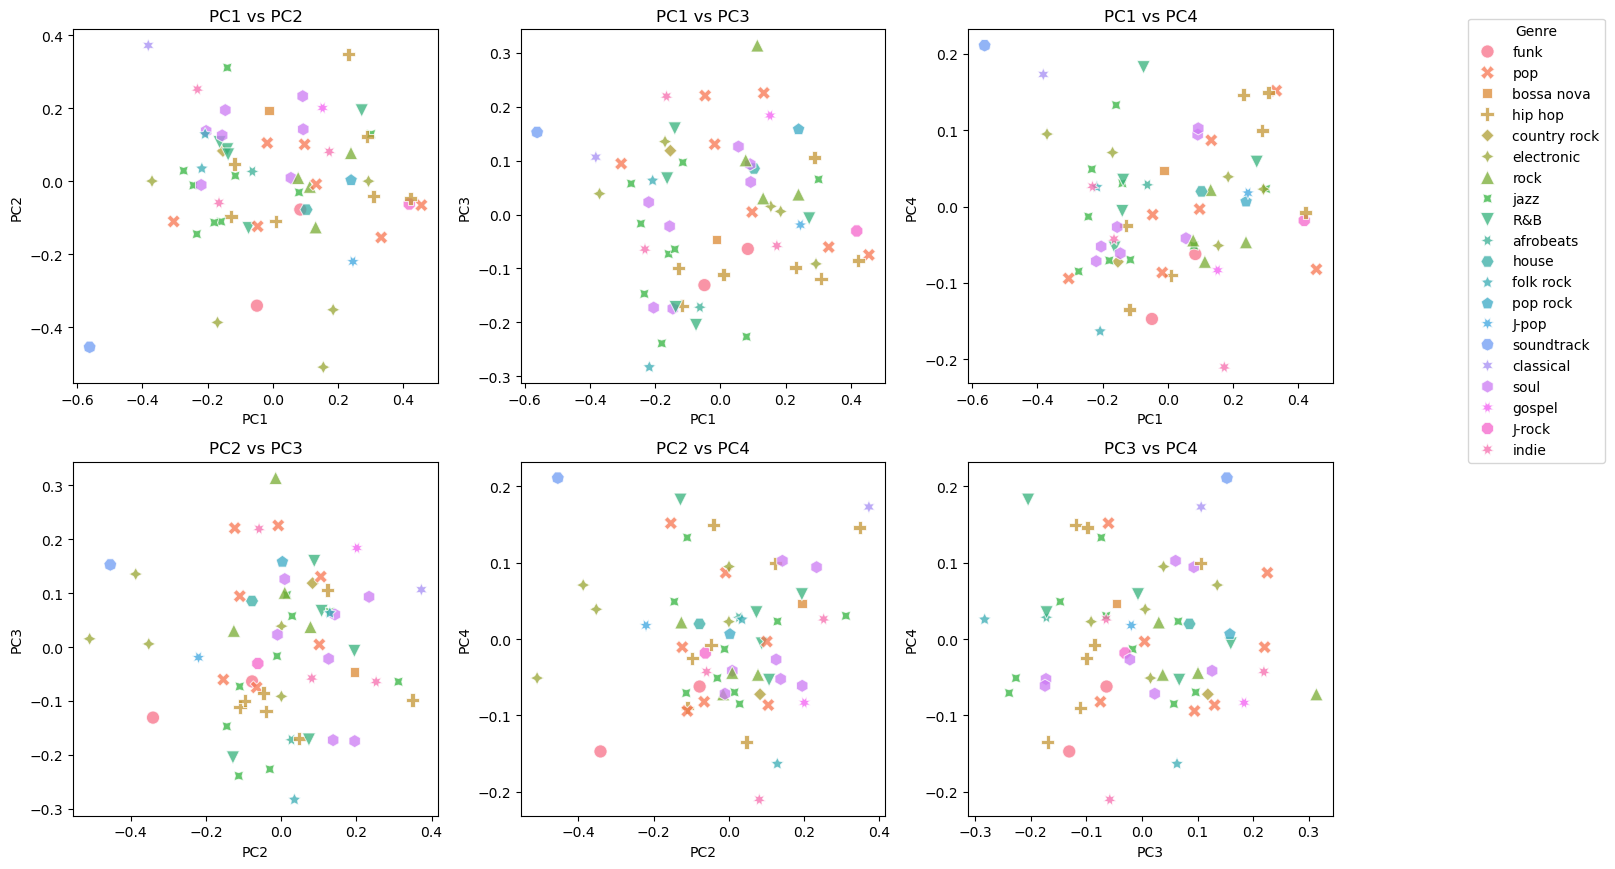

In [27]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

pc_cols = [c for c in ['PC1','PC2','PC3','PC4'] if c in merged_df.columns]
pairs = list(itertools.combinations(pc_cols, 2))

ncols = 3
nrows = (len(pairs) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5.5*ncols, 4.4*nrows), squeeze=False)

last_ax = None
for i, (x, y) in enumerate(pairs):
    ax = axes[i // ncols, i % ncols]
    sns.scatterplot(data=merged_df, x=x, y=y, hue='genre', style='genre', s=90, alpha=0.75, ax=ax)
    ax.set_title(f'{x} vs {y}')
    last_ax = ax

# grab handles/labels once, then remove per-axes legends
handles, labels = last_ax.get_legend_handles_labels()
for ax in axes.flat:
    leg = ax.get_legend()
    if leg: leg.remove()

# hide unused subplots
for j in range(len(pairs), nrows*ncols):
    axes[j // ncols, j % ncols].axis('off')

# single legend at top-right of the figure
plt.tight_layout(rect=[0, 0, 0.82, 1])  # leave space on the right
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.98), title='Genre', frameon=True)
plt.show()


## Centroids, Kmeans, and Clusters reminder:
- In data science, particularly within clustering algorithms like K-Means, a centroid is a crucial concept. 
- It represents the center or mean of a cluster of data points. Imagine having a group of similar data points; the centroid is like the single point that best summarizes their average position in the dataset. 
- **closer look at what that means**
  - Average Position: 
    - The centroid is calculated as the arithmetic mean of all the data points belonging to a particular cluster. For example, if you have a cluster of data points in a two-dimensional space, the centroid's x-coordinate would be the average of all the x-coordinates within that cluster, and similarly for the y-coordinate.
  - Cluster Representation: 
    - In centroid-based clustering, each cluster is defined and represented by its centroid. The goal of these algorithms is to group data points such that each point is assigned to the cluster whose centroid is closest to it, and the total distance between the data points and their respective cluster centroids is minimized.
  - Iterative Process: 
    - Algorithms like K-Means begin by randomly initializing centroids. Then, data points are assigned to the closest centroid, and the centroids are re-calculated based on the new cluster assignments. This process repeats until the centroids no longer shift significantly, indicating stable clusters.
  - Not necessarily a data point:
    - It's important to remember that a centroid might not be an actual data point from the dataset itself, rather it's a calculated average, according to Data Science Discovery. 
In essence, centroids act as the central anchors that help define and organize data points into meaningful groups based on their similarities. 

## Questions

Using the visualizations you've generated, answer the 4 exploratory questions below. If you are not able to answer this question, describe to the best of your ability, what sorts of roadblocks, errors, or questions  you encountered when attempting to answer the question. This will be sufficient for a full grade.

An example of what this looks like is included below.

### Example Question

Which individual tracks are outliers in PC space?

I’m not entirely sure of the exact formula or functions to use here
* Whats the right threshold for calling something an "outlier"?
* How do I handle missing or extreme PCA values before finding outliers?

### Q1 

How are songs distributed (if a distribution exists) in the principal‐component dimensions by genre?

Which genre shows the highest (and lowest) average value on PC1?

Do any genres exhibit particularly wide dispersion along PC3?

Are any pairs of PCA components strongly correlated?



[Answer Here]

### Q2 

Which genre shows the highest (and lowest) average value on PC1?

[Answer Here]

### Q3 

Do any genres exhibit particularly wide dispersion along PC3?

[Answer Here]

### Q4

Are any pairs of PCA components strongly correlated?

[Answer Here]